# Object Detection with Faster RCNN Using TFHub



**TensorFlow Hub** is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

From **object detection**, **image classification**, **text embeddings**, **audio**, and **video action recognition**, TensorFlow Hub is a space where you can browse trained models and datasets from across the TensorFlow ecosystem. 


In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from urllib.request import urlopen
from six import BytesIO #Used internally by PIL 
from PIL import Image, ImageDraw, ImageFont
#https://pillow.readthedocs.io/en/3.0.x/reference/ImageDraw.html - Visit this link to learn more about PIL and ImageDraw, ImageFont, Image

import tensorflow as tf
import tensorflow_hub as hub

print("Libraries Imported")
print("Tensorflow version:", tf.__version__)

Libraries Imported
Tensorflow version: 2.12.0


### Helper method to load an image


In [2]:
def load_image_into_numpy_array(path):
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)


IMAGES_FOR_TEST = {
  'Beach' : 'models/research/object_detection/test_images/image2.jpg',
  'Dogs' : 'models/research/object_detection/test_images/image1.jpg',
  'Naxos Taverna' : 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg',
  'Beatles' : 'https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg',
  'Phones' : 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg',
  'Birds' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg',
}


### Tensorflow-hub models

In [3]:
ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1',
'Faster R-CNN Inception Resnet': 'https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1'
}


### Load the tensor-hub model
All the models are pre-trained on **[MS-COCO](https://cocodataset.org/#home)** Dataset


In [4]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name = 'Faster R-CNN ResNet50 V1 1024x1024' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024', 'Faster R-CNN Inception Resnet']
model_handle = ALL_MODELS[model_display_name]

print('Selected model:'+ model_display_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))

Selected model:Faster R-CNN ResNet50 V1 1024x1024
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1


Faster R-CNN ResNet50 V1 1024x1024

In [ ]:
# model_handle = 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1'

In [5]:
print('Loading Model......')

hub_model = hub.load(model_handle)

print('Model Loaded!!!!')

Loading Model......
Model Loaded!!!!


In [ ]:
# hub_model.summary()

### Load an image




models/research/object_detection/test_images/image2.jpg


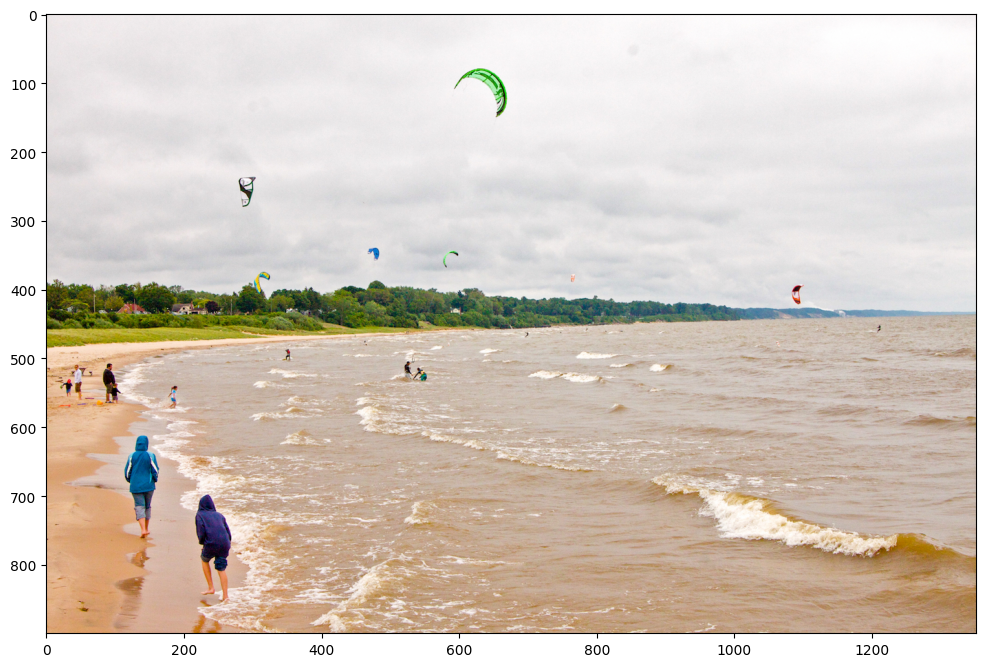

In [21]:
#@title Image Selection (don't forget to execute the cell!) { display-mode: "form"}
selected_image = 'Beach' # @param ['Beach', 'Dogs', 'Naxos Taverna', 'Beatles', 'Phones', 'Birds']

image_path = IMAGES_FOR_TEST[selected_image]
print(image_path)
image_np = load_image_into_numpy_array(image_path)

plt.figure(figsize=(12,16))
plt.imshow(image_np[0])
plt.show()

### Inference

To do the inference, call the TF Hub loaded model



In [22]:
# running inference
results = hub_model(image_np)

# different object detection models have additional results
# all of them are explained in the documentation
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

dict_keys(['raw_detection_scores', 'detection_anchor_indices', 'detection_scores', 'num_detections', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'raw_detection_boxes'])


In [23]:
result['num_detections']

array([300.], dtype=float32)

In [24]:
objectNo = 3
print('Detected Object no:', objectNo)
detectedObjectId = result['detection_classes'][0, objectNo]
print(detectedObjectId)
print(result['detection_boxes'][0,objectNo])
print(result['detection_scores'][0,objectNo])

Detected Object no: 3
38.0
[0.08753382 0.43671227 0.16721694 0.49322826]
0.960826


In [25]:
print(result['detection_classes'][0])
print(result['detection_scores'][0])

[ 1.  1.  1. 38.  1.  1.  1.  1.  1.  1. 38. 38.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. 42.  1. 22. 16. 18.  1.  1.  1.  1.  1.  1. 42. 16. 38.
  1.  1.  1.  1.  1. 22.  1.  1. 37.  1. 19. 19. 42. 38. 42. 16. 38. 37.
  1.  1. 16.  1. 24.  1. 38. 42.  1. 16.  3. 16. 42. 21. 21. 20. 16.  1.
 38. 16. 16. 16.  8. 16.  1. 38. 38. 20. 37.  1. 16. 18.  1.  1. 16. 21.
 37. 38.  1. 10. 19.  1.  3. 38. 16.  1. 10.  1.  1. 24. 42. 16.  1. 10.
  1.  1. 17.  1. 42. 20. 16. 20. 21.  1.  1.  1.  1. 38. 42. 42.  1. 38.
 35. 37. 23.  1. 42. 20. 42.  9. 37. 20. 20. 19. 21.  1.  7. 27. 25. 16.
 20. 37. 38. 38. 35. 16. 21. 20.  1. 34.  1. 21. 16. 44. 38. 16. 16. 14.
 42. 16. 28.  1. 16. 37. 42. 10. 19. 42. 20. 42. 16.  1. 20. 21.  1. 10.
 18. 37. 42. 16. 38. 42. 57. 34.  9. 27. 42. 38. 16.  1. 57.  1. 20. 20.
 42. 24. 16. 37. 42. 16. 28.  9. 38. 16. 42. 16.  3. 20.  1. 35. 19.  1.
  1. 16. 53. 42.  1. 16.  1. 10.  1. 21. 20. 10.  1. 16. 27. 27. 20. 31.
 21. 38. 16.  1. 62. 19.  6. 42. 37.  1.  3. 42. 37

### Installing the Object Detection API

- To visualize the images with the proper detected boxes, keypoints and segmentation, we will use the TensorFlow Object Detection API
- To install it we will clone the repo.

In [13]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3733, done.
remote: Counting objects: 100% (3733/3733), done.
remote: Compressing objects: 100% (2853/2853), done.
remote: Total 3733 (delta 1068), reused 1851 (delta 830), pack-reused 0
Receiving objects: 100% (3733/3733), 48.74 MiB | 24.69 MiB/s, done.
Resolving deltas: 100% (1068/1068), done.


In [14]:
# - Protocol buffers are Google's language-neutral, platform-neutral, extensible mechanism for serializing structured data
# – Similar to what pickle does
# - But Pickle doesn't deal well with schema evolution, and also doesn't work very well if you need to share data with applications written in C++ or Java.
# - With protocol buffers, you write a .proto description of the data structure you wish to store.
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5.2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
# Import the dependencies
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

RuntimeError: ignored

### Load the COCO dataset class labels

In [16]:
# COCO dataset classes -- index nos. to name mapping 
# When our convolution network predicts `5`, we know that this corresponds to `airplane`
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

#### category_index dictionary:
{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name': 'frisbee'}, 35: {'id': 35, 'name': 'skis'}, 36: {'id': 36, 'name': 'snowboard'}, 37: {'id': 37, 'name': 'sports ball'}, 38: {'id': 38, 'name': 'kite'}, 39: {'id': 39, 'name': 'baseball bat'}, 40: {'id': 40, 'name': 'baseball glove'}, 41: {'id': 41, 'name': 'skateboard'}, 42: {'id': 42, 'name': 'surfboard'}, 43: {'id': 43, 'name': 'tennis racket'}, 44: {'id': 44, 'name': 'bottle'}, 46: {'id': 46, 'name': 'wine glass'}, 47: {'id': 47, 'name': 'cup'}, 48: {'id': 48, 'name': 'fork'}, 49: {'id': 49, 'name': 'knife'}, 50: {'id': 50, 'name': 'spoon'}, 51: {'id': 51, 'name': 'bowl'}, 52: {'id': 52, 'name': 'banana'}, 53: {'id': 53, 'name': 'apple'}, 54: {'id': 54, 'name': 'sandwich'}, 55: {'id': 55, 'name': 'orange'}, 56: {'id': 56, 'name': 'broccoli'}, 57: {'id': 57, 'name': 'carrot'}, 58: {'id': 58, 'name': 'hot dog'}, 59: {'id': 59, 'name': 'pizza'}, 60: {'id': 60, 'name': 'donut'}, 61: {'id': 61, 'name': 'cake'}, 62: {'id': 62, 'name': 'chair'}, 63: {'id': 63, 'name': 'couch'}, 64: {'id': 64, 'name': 'potted plant'}, 65: {'id': 65, 'name': 'bed'}, 67: {'id': 67, 'name': 'dining table'}, 70: {'id': 70, 'name': 'toilet'}, 72: {'id': 72, 'name': 'tv'}, 73: {'id': 73, 'name': 'laptop'}, 74: {'id': 74, 'name': 'mouse'}, 75: {'id': 75, 'name': 'remote'}, 76: {'id': 76, 'name': 'keyboard'}, 77: {'id': 77, 'name': 'cell phone'}, 78: {'id': 78, 'name': 'microwave'}, 79: {'id': 79, 'name': 'oven'}, 80: {'id': 80, 'name': 'toaster'}, 81: {'id': 81, 'name': 'sink'}, 82: {'id': 82, 'name': 'refrigerator'}, 84: {'id': 84, 'name': 'book'}, 85: {'id': 85, 'name': 'clock'}, 86: {'id': 86, 'name': 'vase'}, 87: {'id': 87, 'name': 'scissors'}, 88: {'id': 88, 'name': 'teddy bear'}, 89: {'id': 89, 'name': 'hair drier'}, 90: {'id': 90, 'name': 'toothbrush'}}

In [17]:
category_index[62]

{'id': 62, 'name': 'chair'}

In [19]:
objectNo = 1
print('Detected Object no:', objectNo)
detectedObjectId = result['detection_classes'][0, objectNo]
print(detectedObjectId)
print(result['detection_boxes'][0,objectNo])
print(result['detection_scores'][0,objectNo])
category_index[detectedObjectId]

Detected Object no: 1
62.0
[0.624211   0.13334219 0.78014094 0.20913906]
0.92635363


{'id': 62, 'name': 'chair'}

### Visualize the results



In [27]:
label_id_offset = 0
image_np_with_detections = image_np.copy()

# # Use keypoints if available in detections
# keypoints, keypoint_scores = None, None
# if 'detection_keypoints' in result:
#   keypoints = result['detection_keypoints'][0]
#   keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.40, #Set `min_score_thresh` (between 0 and 1) to allow more detections or to filter out more detections
      agnostic_mode=False)
      # keypoints=keypoints,
      # keypoint_scores=keypoint_scores,
      # keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)
plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Models from tf-hub

### List of tuples with Human Keypoints for the COCO 2017 dataset. This is needed for models with keyponts.

In [ ]:
COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

In [ ]:
# For human pose points, one more parameter needs to be added to the function as below:
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,

      #Here you can set `min_score_thresh` to other values (between 0 and 1) to allow more detections in or to filter out more detections
      
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores
      ,keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)